CUSTOMER SEGMENTATION USING PYSPARK



* 21ALR024-KAVIN VISHNU N
* 21ALR045-SRUTHI K
* 21ALR047-SUGANTH V






CUSTOMER SEGMENTATION USING PYSPARK

PROBLEM STATEMENT:
 Using customers recency - the last day they made a transaction.
frequency - How often they patronise the product
monetary value(in term of money)- How much have they spent on purchasing.


DATASET EXPLANATION

Rows:541909

Columns:8

InvoiceNo-Uniquely assigned to each transaction

StockCode-Product (item) code.

Description-Product (item) name.

Quantity-The quantities of each product (item) per transaction

InvoiceDate-date and time of the transaction

UnitPrice-Price per unit.

CustomerID-Unique id for each customer

Country-name of the country where a customer resides


In [ ]:
pip install opendatasets

In [ ]:
!pip install pyspark

In [ ]:
'''{"username":"kavinvishnun21alr024","key":"dfc80afdf0f37f079d5b19da8cb51bca"}'''

'{"username":"kavinvishnun21alr024","key":"dfc80afdf0f37f079d5b19da8cb51bca"}'

In [ ]:
import opendatasets as od
from pyspark.sql import SparkSession
od.download('https://www.kaggle.com/datasets/hellbuoy/online-retail-customer-clustering?resource=download')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kavinvishnun21alr024
Your Kaggle Key: ··········


100%|██████████| 7.22M/7.22M [00:00<00:00, 70.0MB/s]

In [ ]:
#creating spark context
spark = SparkSession.builder.appName("Customer segmentation").getOrCreate()
spark.sparkContext

<SparkContext master=local[*] appName=Customer segmentation>

In [ ]:
#uploading the dataset
df = spark.read.csv("/content/online-retail-customer-clustering/OnlineRetail.csv", header=True, inferSchema=True)
df.show()

+---------+---------+--------------------+--------+----------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|     InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+----------------+---------+----------+--------------+
|   536365|   85123A|WHITE HANGING HEA...|       6|01-12-2010 08:26|     2.55|     17850|United Kingdom|
|   536365|    71053| WHITE METAL LANTERN|       6|01-12-2010 08:26|     3.39|     17850|United Kingdom|
|   536365|   84406B|CREAM CUPID HEART...|       8|01-12-2010 08:26|     2.75|     17850|United Kingdom|
|   536365|   84029G|KNITTED UNION FLA...|       6|01-12-2010 08:26|     3.39|     17850|United Kingdom|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6|01-12-2010 08:26|     3.39|     17850|United Kingdom|
|   536365|    22752|SET 7 BABUSHKA NE...|       2|01-12-2010 08:26|     7.65|     17850|United Kingdom|
|   536365|    21730|GLASS STAR FROSTE...|       6|01-1

In [ ]:
#total number of rows
df.count()

541909

In [ ]:
df.printSchema()

root
 |-- InvoiceNo: string (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- InvoiceDate: string (nullable = true)
 |-- UnitPrice: double (nullable = true)
 |-- CustomerID: integer (nullable = true)
 |-- Country: string (nullable = true)



In [ ]:
#number of null values in each column
from pyspark.sql.functions import *
df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+---------+---------+-----------+--------+-----------+---------+----------+-------+
|InvoiceNo|StockCode|Description|Quantity|InvoiceDate|UnitPrice|CustomerID|Country|
+---------+---------+-----------+--------+-----------+---------+----------+-------+
|        0|        0|       1454|       0|          0|        0|    135080|      0|
+---------+---------+-----------+--------+-----------+---------+----------+-------+



In [ ]:
#removing null values
df=df.dropna(how='any')

In [ ]:
df.count()

406829

In [ ]:
#number of null values in each column

df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+---------+---------+-----------+--------+-----------+---------+----------+-------+
|InvoiceNo|StockCode|Description|Quantity|InvoiceDate|UnitPrice|CustomerID|Country|
+---------+---------+-----------+--------+-----------+---------+----------+-------+
|        0|        0|          0|       0|          0|        0|         0|      0|
+---------+---------+-----------+--------+-----------+---------+----------+-------+



In [ ]:
df.show(5,truncate=False)

+---------+---------+-----------------------------------+--------+----------------+---------+----------+--------------+
|InvoiceNo|StockCode|Description                        |Quantity|InvoiceDate     |UnitPrice|CustomerID|Country       |
+---------+---------+-----------------------------------+--------+----------------+---------+----------+--------------+
|536365   |85123A   |WHITE HANGING HEART T-LIGHT HOLDER |6       |01-12-2010 08:26|2.55     |17850     |United Kingdom|
|536365   |71053    |WHITE METAL LANTERN                |6       |01-12-2010 08:26|3.39     |17850     |United Kingdom|
|536365   |84406B   |CREAM CUPID HEARTS COAT HANGER     |8       |01-12-2010 08:26|2.75     |17850     |United Kingdom|
|536365   |84029G   |KNITTED UNION FLAG HOT WATER BOTTLE|6       |01-12-2010 08:26|3.39     |17850     |United Kingdom|
|536365   |84029E   |RED WOOLLY HOTTIE WHITE HEART.     |6       |01-12-2010 08:26|3.39     |17850     |United Kingdom|
+---------+---------+-------------------

In [ ]:
df.describe().show()

+-------+------------------+------------------+--------------------+------------------+----------------+-----------------+------------------+-----------+
|summary|         InvoiceNo|         StockCode|         Description|          Quantity|     InvoiceDate|        UnitPrice|        CustomerID|    Country|
+-------+------------------+------------------+--------------------+------------------+----------------+-----------------+------------------+-----------+
|  count|            406829|            406829|              406829|            406829|          406829|           406829|            406829|     406829|
|   mean| 560617.1266447864|27430.341352504624|                NULL| 12.06130339774205|            NULL|3.460471018535547|15287.690570239585|       NULL|
| stddev|13106.167694739583|16403.570452626172|                NULL|248.69337001882369|            NULL|69.31516172321382|1713.6003033215932|       NULL|
|    min|            536365|             10002| 4 PURPLE FLOCK D...|        

In [ ]:
from pyspark.sql.functions import *

In [ ]:
df.groupBy("Country").count().sort("count", ascending=False).show(10)

+--------------+------+
|       Country| count|
+--------------+------+
|United Kingdom|361878|
|       Germany|  9495|
|        France|  8491|
|          EIRE|  7485|
|         Spain|  2533|
|   Netherlands|  2371|
|       Belgium|  2069|
|   Switzerland|  1877|
|      Portugal|  1480|
|     Australia|  1259|
+--------------+------+
only showing top 10 rows



In [ ]:
from pyspark.sql.functions import round
df = df.filter(col("Quantity") > 0)
df = df.withColumn("TotalAmount", round(col("Quantity") * col("UnitPrice")))
df.show(5)

+---------+---------+--------------------+--------+----------------+---------+----------+--------------+-----------+
|InvoiceNo|StockCode|         Description|Quantity|     InvoiceDate|UnitPrice|CustomerID|       Country|TotalAmount|
+---------+---------+--------------------+--------+----------------+---------+----------+--------------+-----------+
|   536365|   85123A|WHITE HANGING HEA...|       6|01-12-2010 08:26|     2.55|     17850|United Kingdom|       15.0|
|   536365|    71053| WHITE METAL LANTERN|       6|01-12-2010 08:26|     3.39|     17850|United Kingdom|       20.0|
|   536365|   84406B|CREAM CUPID HEART...|       8|01-12-2010 08:26|     2.75|     17850|United Kingdom|       22.0|
|   536365|   84029G|KNITTED UNION FLA...|       6|01-12-2010 08:26|     3.39|     17850|United Kingdom|       20.0|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6|01-12-2010 08:26|     3.39|     17850|United Kingdom|       20.0|
+---------+---------+--------------------+--------+-------------

In [ ]:
df.columns

['InvoiceNo',
 'StockCode',
 'Description',
 'Quantity',
 'InvoiceDate',
 'UnitPrice',
 'CustomerID',
 'Country',
 'TotalAmount']

In [ ]:
df.select('TotalAmount').show(10)

+-----------+
|TotalAmount|
+-----------+
|       15.0|
|       20.0|
|       22.0|
|       20.0|
|       20.0|
|       15.0|
|       26.0|
|       11.0|
|       11.0|
|       54.0|
+-----------+
only showing top 10 rows



In [ ]:
from pyspark.sql.types import IntegerType
from datetime import datetime
df = df.withColumn("new", split(df["InvoiceDate"], " "))
df = df.withColumn("date", col("new")[0])
df= df.withColumn("time", substring(col("new")[1], 0, 2).cast(IntegerType()))
df= df.drop("new", "InvoiceDate")
df.show()

+---------+---------+--------------------+--------+---------+----------+--------------+-----------+----------+----+
|InvoiceNo|StockCode|         Description|Quantity|UnitPrice|CustomerID|       Country|TotalAmount|      date|time|
+---------+---------+--------------------+--------+---------+----------+--------------+-----------+----------+----+
|   536365|   85123A|WHITE HANGING HEA...|       6|     2.55|     17850|United Kingdom|       15.0|01-12-2010|   8|
|   536365|    71053| WHITE METAL LANTERN|       6|     3.39|     17850|United Kingdom|       20.0|01-12-2010|   8|
|   536365|   84406B|CREAM CUPID HEART...|       8|     2.75|     17850|United Kingdom|       22.0|01-12-2010|   8|
|   536365|   84029G|KNITTED UNION FLA...|       6|     3.39|     17850|United Kingdom|       20.0|01-12-2010|   8|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6|     3.39|     17850|United Kingdom|       20.0|01-12-2010|   8|
|   536365|    22752|SET 7 BABUSHKA NE...|       2|     7.65|     17850|

In [ ]:
pandas_df=df.toPandas()

In [ ]:
print(pandas_df.InvoiceNo.min())
print(pandas_df.InvoiceNo.max())

536365
581587


In [ ]:
import pandas as pd
import numpy as np
pandas_df['date']=pd.to_datetime(pandas_df['date'])
pandas_df.head(5)

<ipython-input-28-4f7372afd0d4>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  pandas_df['date']=pd.to_datetime(pandas_df['date'])


,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,TotalAmount,date,time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850,United Kingdom,15.0,2010-01-12,8
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850,United Kingdom,20.0,2010-01-12,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850,United Kingdom,22.0,2010-01-12,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850,United Kingdom,20.0,2010-01-12,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850,United Kingdom,20.0,2010-01-12,8


In [ ]:
indv_cust_cost=pandas_df.groupby("CustomerID").TotalAmount.sum()
indv_cust_cost = indv_cust_cost.reset_index()
indv_cust_cost.head()

,CustomerID,TotalAmount
0,12346,77184.0
1,12347,4311.0
2,12348,1797.0
3,12349,1767.0
4,12350,334.0


In [ ]:
frequency=pandas_df.groupby("CustomerID").InvoiceNo.count()
frequency = frequency.reset_index()
frequency.head()

,CustomerID,InvoiceNo
0,12346,1
1,12347,182
2,12348,31
3,12349,73
4,12350,17


In [ ]:
LastDate=pandas_df.date.max()
LastDate = LastDate + pd.DateOffset(days=1)
pandas_df["Diff"] = LastDate - pandas_df.date
recency = pandas_df.groupby("CustomerID").Diff.min()
recency = recency.reset_index()
recency.head()

,CustomerID,Diff
0,12346,327 days
1,12347,41 days
2,12348,77 days
3,12349,20 days
4,12350,312 days


In [ ]:
m=indv_cust_cost.merge(frequency,on="CustomerID")
data=m.merge(recency,on="CustomerID")
data.Diff=data.Diff.dt.days

data.columns=['CustomerID','TotalAmount','Frequency','Recency']
data.head()

,CustomerID,TotalAmount,Frequency,Recency
0,12346,77184.0,1,327
1,12347,4311.0,182,41
2,12348,1797.0,31,77
3,12349,1767.0,73,20
4,12350,334.0,17,312


In [ ]:
data.describe()

,CustomerID,TotalAmount,Frequency,Recency
count,4339.000000,4339.000000,4339.000000,4339.000000
mean,15299.936852,2060.597603,91.708689,106.461858
std,1721.889758,8992.625648,228.792852,115.083263
min,12346.000000,0.000000,1.000000,1.000000
25%,13812.500000,308.000000,17.000000,23.000000
50%,15299.000000,677.000000,41.000000,62.000000
75%,16778.500000,1671.500000,100.000000,162.500000
max,18287.000000,280205.000000,7847.000000,698.000000


In [ ]:
data.drop("CustomerID",axis=1).head()

,TotalAmount,Frequency,Recency
0,77184.0,1,327
1,4311.0,182,41
2,1797.0,31,77
3,1767.0,73,20
4,334.0,17,312


In [ ]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StandardScaler
from pyspark.ml.evaluation import ClusteringEvaluator

In [ ]:
spark_df=spark.createDataFrame(data)

In [ ]:
data1 = (spark_df.withColumn("TotalAmount", when(col("TotalAmount") <= 0, 1).otherwise(col("TotalAmount"))))

In [ ]:
features = data1.columns[1:]

In [ ]:
#vector assembler
assembler = VectorAssembler(inputCols=features, outputCol="vectorized_features")
assembled_data = assembler.transform(data1)
assembled_data = assembled_data.select('CustomerID', 'vectorized_features')
assembled_data.show(5)

+----------+-------------------+
|CustomerID|vectorized_features|
+----------+-------------------+
|     12346|[77184.0,1.0,327.0]|
|     12347|[4311.0,182.0,41.0]|
|     12348| [1797.0,31.0,77.0]|
|     12349| [1767.0,73.0,20.0]|
|     12350| [334.0,17.0,312.0]|
+----------+-------------------+
only showing top 5 rows



In [ ]:
#standardization
scaler = StandardScaler(inputCol='vectorized_features', outputCol='standardized_value')
data_scale = scaler.fit(assembled_data)
scaled_data = data_scale.transform(assembled_data)
scaled_data.show(5)

+----------+-------------------+--------------------+
|CustomerID|vectorized_features|  standardized_value|
+----------+-------------------+--------------------+
|     12346|[77184.0,1.0,327.0]|[8.58303275088972...|
|     12347|[4311.0,182.0,41.0]|[0.47939280406671...|
|     12348| [1797.0,31.0,77.0]|[0.19983040336531...|
|     12349| [1767.0,73.0,20.0]|[0.19649433653117...|
|     12350| [334.0,17.0,312.0]|[0.03714154408682...|
+----------+-------------------+--------------------+
only showing top 5 rows



In [ ]:
k_values = range(2, 10)
costs = []


In [ ]:
#finding optimal number of clusters
for i in k_values:
    kmeans = KMeans(k=i, seed=1, featuresCol='standardized_value')
    model = kmeans.fit(scaled_data)
    cost = model.summary.trainingCost
    costs.append(cost)

In [ ]:
costs_array = np.array(costs)
costs_array

array([9902.26578113, 5934.98504593, 5246.99166235, 4312.47004526,
       2769.40756867, 2421.30457581, 2300.59082486, 1821.1923421 ])

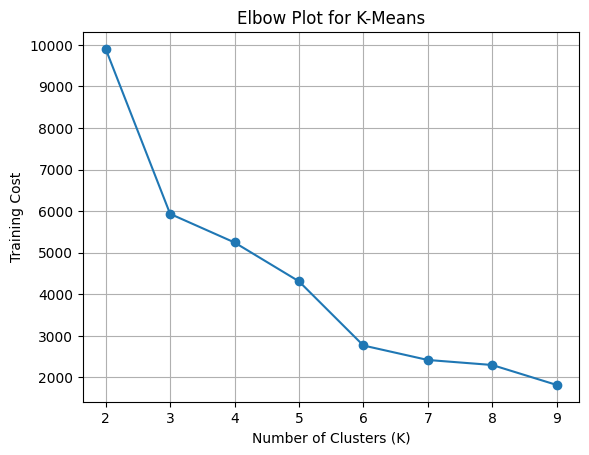

In [ ]:
#elbow method
import matplotlib.pyplot as plt
plt.plot(k_values,costs, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Training Cost')
plt.title('Elbow Plot for K-Means')
plt.grid(True)
plt.show()

In [ ]:
#kmeans clustering
k_means = KMeans(featuresCol='standardized_value', k=3)
model = k_means.fit(scaled_data)
predictions = model.transform(scaled_data)
result = predictions.select('CustomerID', 'prediction')
result1 = predictions.select('prediction')
result.show()

+----------+----------+
|CustomerID|prediction|
+----------+----------+
|     12346|         0|
|     12347|         1|
|     12348|         1|
|     12349|         1|
|     12350|         0|
|     12352|         1|
|     12353|         0|
|     12354|         0|
|     12355|         1|
|     12356|         1|
|     12357|         0|
|     12358|         1|
|     12359|         1|
|     12360|         1|
|     12361|         0|
|     12362|         1|
|     12363|         1|
|     12364|         1|
|     12365|         0|
|     12367|         0|
+----------+----------+
only showing top 20 rows



In [ ]:
from pyspark.sql.functions import when,lit

result = result.withColumn('prediction',
    when(result['prediction'] == "0", 'diamond')
    .when(result['prediction'] == "1", 'platinum')
    .otherwise('gold')
)
result=result.withColumnRenamed("prediction",'target')
result.show(5)

+----------+--------+
|CustomerID|  target|
+----------+--------+
|     12346| diamond|
|     12347|platinum|
|     12348|platinum|
|     12349|platinum|
|     12350| diamond|
+----------+--------+
only showing top 5 rows



In [ ]:
result=result.toPandas()

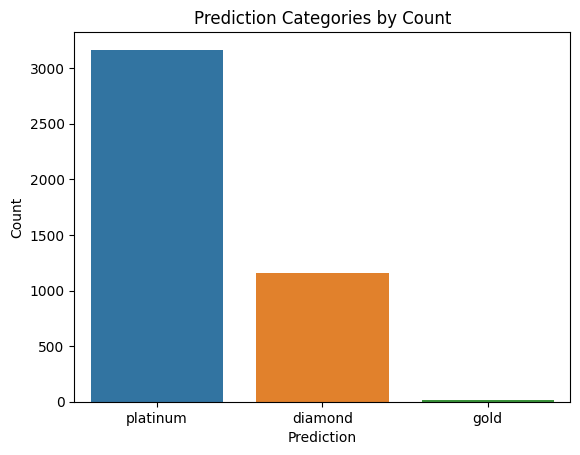

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
prediction_counts = result['target'].value_counts()
top_n_predictions = prediction_counts.head(4339)
sns.barplot(x=top_n_predictions.index, y=top_n_predictions.values)
plt.xlabel('Prediction')
plt.ylabel('Count')
plt.title(f'Prediction Categories by Count')
plt.show()


In [ ]:
data

,CustomerID,TotalAmount,Frequency,Recency
0,12346,77184.0,1,327
1,12347,4311.0,182,41
2,12348,1797.0,31,77
3,12349,1767.0,73,20
4,12350,334.0,17,312
...,...,...,...,...
4334,18280,182.0,10,161
4335,18281,81.0,7,5
4336,18282,181.0,12,217
4337,18283,2140.0,756,11


In [ ]:
result

,CustomerID,target
0,12346,diamond
1,12347,platinum
2,12348,platinum
3,12349,platinum
4,12350,diamond
...,...,...
4334,18280,diamond
4335,18281,platinum
4336,18282,diamond
4337,18283,platinum


In [ ]:
new=pd.merge(data, result, on='CustomerID', how='inner')
new

,CustomerID,TotalAmount,Frequency,Recency,target
0,12346,77184.0,1,327,diamond
1,12347,4311.0,182,41,platinum
2,12348,1797.0,31,77,platinum
3,12349,1767.0,73,20,platinum
4,12350,334.0,17,312,diamond
...,...,...,...,...,...
4334,18280,182.0,10,161,diamond
4335,18281,81.0,7,5,platinum
4336,18282,181.0,12,217,diamond
4337,18283,2140.0,756,11,platinum


In [ ]:
from pyspark import SparkFiles
from pyspark.sql import SparkSession
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.feature import StringIndexer, VectorAssembler, OneHotEncoder
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

In [ ]:
spark = SparkSession.builder.appName("Decision Tree Model").getOrCreate()

In [ ]:
new=spark.createDataFrame(new)

In [ ]:
#string indexer
stringIndexer  = StringIndexer(inputCol="target", outputCol="label")

In [ ]:
#vector assembler
assembler = VectorAssembler(inputCols=['TotalAmount','Frequency','Recency'], outputCol="vectorized_features")

In [ ]:
# Split data into train and test
train_data1, test_data1 = new.randomSplit([0.8, 0.2], seed=42)

In [ ]:
# Create a Decision Tree Classifier
dt = DecisionTreeClassifier(labelCol='label', featuresCol='vectorized_features')

In [ ]:
#defining the pipeline
from pyspark.ml import Pipeline
stages = [stringIndexer,assembler,dt]
pipeline = Pipeline(stages=stages)

In [ ]:
#hyper parameter tuning
paramGrid = ParamGridBuilder() \
    .addGrid(dt.maxDepth, [3, 7]) \
    .addGrid(dt.minInstancesPerNode, [1, 3, 5,7]) \
    .build()

In [ ]:
#crossvalidation
crossvalid = CrossValidator(estimator=pipeline, estimatorParamMaps=paramGrid,
                      evaluator=MulticlassClassificationEvaluator(
                      labelCol='label',predictionCol='prediction', metricName='accuracy'),
                      numFolds=5)
crossmodel = crossvalid.fit(train_data1)

In [ ]:
#make predictions
model = crossmodel.bestModel
predictions = model.transform(test_data1)

In [ ]:
#accuracy
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print(f"Test Accuracy: {accuracy:.2f}")

Test Accuracy: 0.99
